In [1]:
from mfglib.env import Environment
from mfglib.alg.utils import _ensure_free_tensor,tuple_prod
from mfglib.mean_field import mean_field
from typing import Literal, cast
import torch
from mfglib.alg.greedy_policy_given_mean_field import Greedy_Policy
import matplotlib.pyplot as plt
from mfglib.alg import MFOMO,PriorDescent, FictitiousPlay,OnlineMirrorDescent, TwoScaleLearning
from mfglib.metrics import exploitability_score
from mfglib.alg.q_fn import QFn
import scipy
import scienceplots
#plt.style.use(['science','no-latex'])
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


c:\Users\minghuiw\AppData\Local\anaconda3\envs\mfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_instance = Environment.equilibrium_price()

In [4]:
solns, solns_mu, expls, diffs, runtimes = TwoScaleLearning(Q_speed = 0.55, mu_speed=1).solve(env_instance, max_iter=5000, verbose=True)

            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(4,)
	A(3, 3)
	T=4
	r_max=17.0

Algorithm summary:
	OnlineMirrorDescent(Q_speed=0.55, mu_speed=1)
	atol=0.001
	rtol=0.001
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 26.10721 |     1.00000     |          0           |  0.000   |
|  1   | 7.80095  |     0.29880     |          1           |  0.000   |
|  2   | 2.79302  |     0.10698     |          2           |  0.014   |
|  3   | 1.18780  |     0.04550     |          3           |  0.019   |
|  4   | 0.72292  |     0.02769     |          4           |  0.024   |
|  5   | 0.72262  |     0.02768     |          5           |  0.028   |
|  6   | 0.67695  |     0.02593     |        

In [6]:
torch.save(solns, "results/production_pi_record.pt")
torch.save(solns_mu, "results/production_nu_record.pt")
torch.save(expls, "results/production_exp_record.pt")
torch.save(diffs, "results/production_diff_record.pt")
torch.save(runtimes, "results/production_time_record.pt")


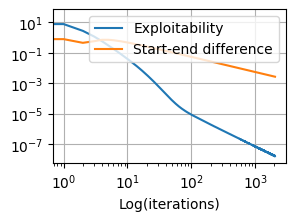

In [7]:
# expls = torch.load("results/beach_exp_record.pt")
# diffs = torch.load("results/beach_diff_record.pt")
plt.figure(figsize=(3, 2))
plt.plot(expls, label='Exploitability') 
plt.plot(diffs, label='Start-end difference') 
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log(iterations)')
plt.savefig('results/production_converge',dpi=300)

plt.show()

tensor([[9.9866e-01, 7.2943e-04, 3.7493e-04, 2.3480e-04],
        [9.9939e-01, 3.8906e-04, 2.2067e-04, 0.0000e+00],
        [9.9978e-01, 2.2067e-04, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 6.4558e-32, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 5.0216e-32, 0.0000e+00, 0.0000e+00]])


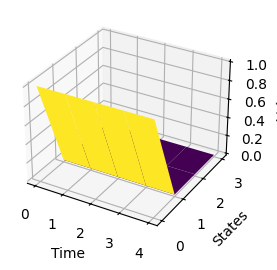

In [8]:
# solns = torch.load("results/beach_pi_record.pt")
# solns_mu = torch.load("results/beach_nu_record.pt")

pi = solns[-1]
nu = solns_mu[-1]

env_instance.update_initial_distribution(nu)
L = mean_field(env_instance, pi)
mu = L.sum(dim=tuple(range(2, L.ndim)))
print(mu)
mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Time")
ax.set_ylabel("States")
ax.set_zlabel("Value")

#plt.savefig('results/beach_CMFE',dpi=300)

plt.show()

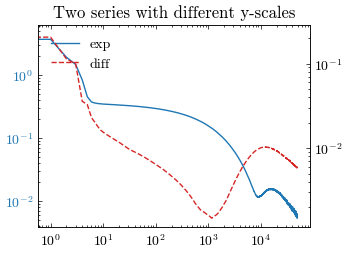

In [66]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax1 = plt.subplots()
ax1.plot(expls, color = colors[0], label='exp')
# ax1.set_xlabel('x')
# ax1.set_ylabel('y1 (x²)', color='g')
ax1.tick_params(axis='y', labelcolor=colors[0])


# create a second y‐axis
ax2 = ax1.twinx()
ax2.plot(diffs, color = colors[3], linestyle = '--', label='diff')
#ax2.set_ylabel('diff')
ax2.tick_params(axis='y')

# optional: combine legends
lines, labels = ax1.get_lines() + ax2.get_lines(), [l.get_label() for l in ax1.get_lines()+ax2.get_lines()]
ax1.legend(lines, labels, loc='upper left')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title("Two series with different y-scales")
plt.show()

            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(4,)
	A(3, 3)
	T=4
	r_max=17.0

Algorithm summary:
	OnlineMirrorDescent(alpha=1.0)
	atol=0.001
	rtol=0.001
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 22.21519 |     1.00000     |          0           |  0.000   |
|  1   | 5.64529  |     0.25412     |          1           |  0.007   |
|  2   | 1.49283  |     0.06720     |          2           |  0.013   |
|  3   | 0.45786  |     0.02061     |          3           |  0.018   |
|  4   | 0.16684  |     0.00751     |          4           |  0.024   |
|  5   | 0.06980  |     0.00314     |          5           |  0.030   |
|  6   | 0.03104  |     0.00140     |          6           |

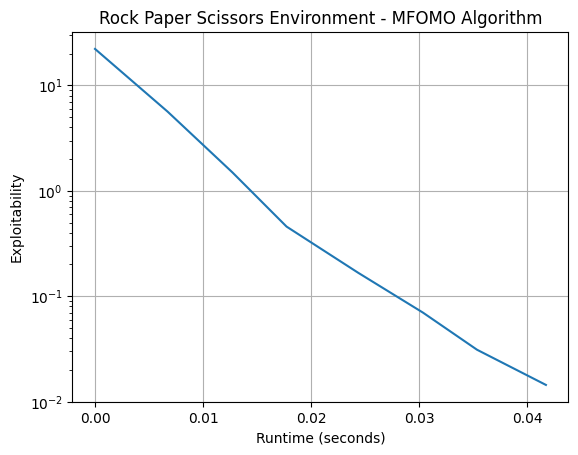

In [9]:
env_instance = Environment.equilibrium_price()
solns, expls, runtimes = OnlineMirrorDescent().solve(env_instance, max_iter=5000, verbose=True)
plt.semilogy(runtimes, exploitability_score(env_instance, solns)) 

plt.grid(True)
plt.xlabel("Runtime (seconds)")
plt.ylabel("Exploitability")
plt.title("Rock Paper Scissors Environment - MFOMO Algorithm")
plt.show()

In [14]:
pi = solns[-1]
print(pi.shape)
L = mean_field(env_instance, pi)
print(L.shape)
for i in range(5):
    mu_N = torch.sum(torch.sum(L[i], axis=1), axis=1)
    print(mu_N)
print(L.sum(dim=tuple(range(2, L.ndim))))

torch.Size([5, 4, 3, 3])
torch.Size([5, 4, 3, 3])
tensor([0.2500, 0.2500, 0.2500, 0.2500])
tensor([4.9915e-01, 2.5908e-01, 2.4177e-01, 1.4865e-07])
tensor([7.5677e-01, 2.4317e-01, 5.9593e-05, 8.0860e-12])
tensor([9.8867e-01, 1.1333e-02, 1.0672e-06, 5.0237e-14])
tensor([9.9015e-01, 9.8524e-03, 8.7706e-07, 7.6444e-13])
tensor([[2.5000e-01, 2.5000e-01, 2.5000e-01, 2.5000e-01],
        [4.9915e-01, 2.5908e-01, 2.4177e-01, 1.4865e-07],
        [7.5677e-01, 2.4317e-01, 5.9593e-05, 8.0860e-12],
        [9.8867e-01, 1.1333e-02, 1.0672e-06, 5.0237e-14],
        [9.9015e-01, 9.8524e-03, 8.7706e-07, 7.6444e-13]])


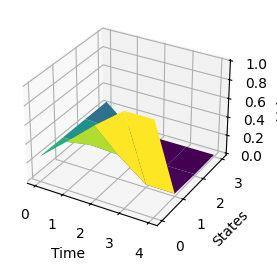

In [10]:
pi = solns[-1]

L = mean_field(env_instance, pi)
mu = L.sum(dim=tuple(range(2, L.ndim)))
mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Time")
ax.set_ylabel("States")
ax.set_zlabel("Value")

#plt.savefig('results/beach_MFE',dpi=300)

plt.show()

In [5]:
torch.save(solns, "results/beach_MFE_pi_record.pt")
torch.save(expls, "results/beach_MFE_exp_record.pt")
torch.save(runtimes, "results/beach_MFE_time_record.pt")
